<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a>
            </span>
        </li>
            <li>
            <span>
                <a href="#Предобработка данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span>
        </li>
            <li>
            <span>
                <a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span>
            </li>
        <ul class="toc-item">
            <li>
                <span>
                    <a href="#Общее-исследование-и-выделение-наиболее-перспективных-платформ" data-toc-modified-id="Общее-исследование-и-выделение-наиболее-перспективных-платформ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общее исследование и выделение наиболее перспективных платформ</a></span>
                </li>
            <li>
                <span>
                    <a href="#Исследование-предпочтений-пользователей-разных-регионов" data-toc-modified-id="Исследование-предпочтений-пользователей-разных-регионов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исследование предпочтений пользователей разных регионов</a></span>
                </li>
            <ul>
                <li><span>
                    <a href="#Исследование-влияния-рейтинга-ESRB-в-регионах" data-toc-modified-id="Исследование-влияния-рейтинга-ESRB-в-регионах-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Исследование влияния рейтинга ESRB в регионах</a></span></li>
            </ul>
        </ul>    <li>
                <span>
                    <a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span>
            </li>
       </ul>
 </div>

# Поиск перспективных направлений для магазина видеоигр.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.

Для выполнения поставленной задачи необходимо выделить актуальный период данных и рассмотреть продажи в зависимости от жанра и региона.

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Сразу выделяется тип данных в столбце 'User_Score', который по логиче долже быть числовым.  
Названия столбцов стоит привести нижнему регистру.  
Также в части столбцов имеются пропуски.

In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Видим, что файл содержит данные с 1980 по 2016 год.  
Также можно сделать вывод, что оценки критиков приведены к 100-бальной шкале.

## Предобработка данных

In [5]:
# приводим сразу все названия столбцов к нижнему регистру.
df.columns = df.columns.str.lower()

In [6]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
df.duplicated().sum() # проверяем явные дубликаты.

0

Явных дубликатов нет.

Проверим датасет на неявные дубликаты для пары "Название игры - Платформа"

In [8]:
df[df.duplicated(subset=['name', 'platform',])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Ничего необычного в таких данных нет, игры выпускаются сразу на нескольких платформах еще с 90-х годов.  
Малое количество таких дубликатов скорее вызывает вопросы к полноте датасета.  

Добавим столбец с общей суммой продаж для каждой игры.

In [9]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Пропуски в столбце с оценками критиков скорее всего говорят о недостаточном количестве ревью конкретной версии игры(Metacritic требует не менее 4), такое как правило случается с только вышедшими играми или же играми вышедшими до начала массового распостранения игровой журналистики.

Пустые значения в оценках пользователей присутсвуют по схожей причине, люди редко ставят оценки играм вышедшим длительное время назад, а потому большиство игр без оценок будет относиться к периоду либо до глобального распостранения интернета, либо до создания сайта собирающего оценки.

Заполнение средними значениями значительно исказит данные, поэтому просто оставим эти значения пустыми.

In [10]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Отсутствие даты выхода результат человеческого фактора, в каких то столбцах она содержится в названии игры(однако на практике, зачастую, эти игры выпускаются годом ранее), где то просто могли забыть заполнить значение. Поскольку таких строк всего 1.5%, отбросим их.

In [11]:
df.shape

(16715, 12)

In [12]:
df.drop(df[df['year_of_release'].isna()].index, inplace=True)

In [13]:
df.shape

(16446, 12)

In [14]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Всего две игры без названия и жанра. Вероятно данные были утрачены в результате механического сбоя. Просто отбросим эти строки.

In [15]:
df.shape

(16446, 12)

In [16]:
df.drop([659, 14244], inplace=True) # только два значения, можно и по идексам просто убрать.

In [17]:
df.shape

(16444, 12)

Попробуем сменить формат столбца с оценками от пользователей на числовой.

In [18]:
try:
    df['user_score'] = df['user_score'].astype('float32')
except:
    print('Формат так просто не сменить')

Формат так просто не сменить


Посмотрим на все уникальные значения столбца и попробуем выяснить источник проблемы.

In [19]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение 'tbd' в столбце с пользовательским рейтингом расшифровывается как 'to be determined', то есть 'неопределено'. С точки зрения исследования это тот же пропуск. Собственно замене на пропуски эти данные и подлежат, это позволит привести оставшиеся значения к числовому формату.

In [20]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

Приведем числовые столбцы к менее затратным для памяти форматам.

In [21]:
# user_score переводим в числовой формат, остальное меняем для производительности.
df['year_of_release'] = df['year_of_release'].astype('int32')
df['user_score'] = df['user_score'].astype('float32')
df['na_sales'] = df['na_sales'].astype('float32')
df['eu_sales'] = df['eu_sales'].astype('float32')
df['jp_sales'] = df['jp_sales'].astype('float32')
df['other_sales'] = df['other_sales'].astype('float32')
df['critic_score'] = df['critic_score'].astype('float32')

Проверим стобцы платформы и жанра на неявные дубликаты.

In [22]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [23]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

С неявными дубликатами тоже всё в порядке.

In [24]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Система рейтингов была введена в сентябре 1994 года и регулирует рейтинги только для Северной Америки. Игры выпущенные до сентября 1994 года или не поступавшие в официальную продажу в Северное Америке этого рейтинга иметь не будут. Заполним пустые значения 'Unknown', также заменим рейтинг 'RP', что фактически означает отсутствие рейтинга на момент получения данных. Как и с оценками, заполнять пропуски чем то другим, будет ошибкой.

In [25]:
df['rating'] = df['rating'].replace('RP', 'Unknown')
df['rating'] = df['rating'].fillna('Unknown')

Подводя итоги предобработки данных:  
Названия столбцов приведены к нижнему регистру.  
Данные слобца 'user_score' приведены к числовому формату.  
Заполнена часть пропусков.  
Отброшена часть неполных данных.

Также необходимо выделить актуальный период для исследования, однако это будет сделано в следующем разделе.

## Исследовательский анализ данных

### Общее исследование и выделение наиболее перспективных платформ

Взглянем на количество выпускаемых игр по годам.

Text(0, 0.5, 'Количество выпущенных игр')

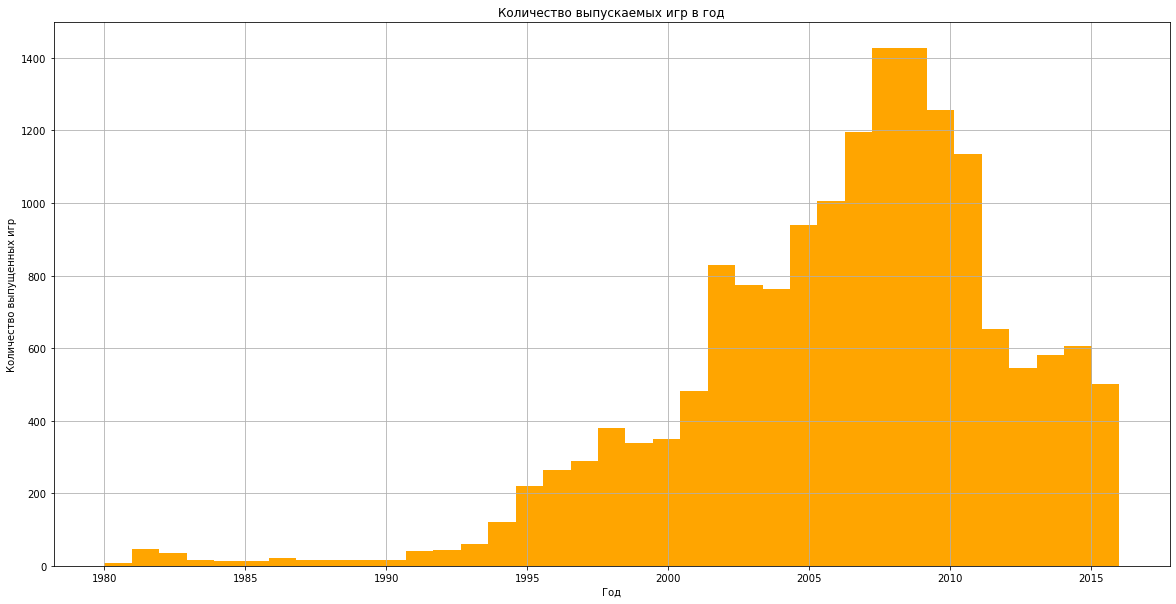

In [26]:
df.hist('year_of_release', color='orange', bins=37, figsize=(20, 10))
plt.title('Количество выпускаемых игр в год')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')

Заметно, что своего пика индустрия достигла в 2008-2009 годах, после чего произошел спад на текущие позиции.

Взгянем на пятерку самых популярный платформ за всё время.

In [27]:
df['platform'].value_counts().head()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
Name: platform, dtype: int64

Ничего неожиданного, это как раз основные платформы пикового периода.  
Установим среднюю длину "жизненного цикла" популярных платформ.  
Построим гистограммы для каждой из ни, границы значений и будут показывать эту длину.

Text(0, 0.5, 'Количество выпущенных игр')

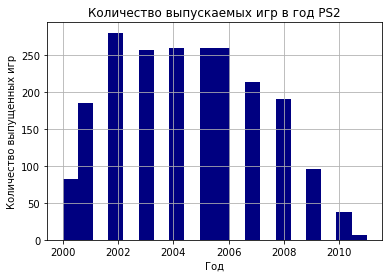

In [28]:
df.query('platform == "PS2"').hist('year_of_release', color='navy', bins=20,)
plt.title('Количество выпускаемых игр в год PS2')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')

Text(0, 0.5, 'Количество выпущенных игр')

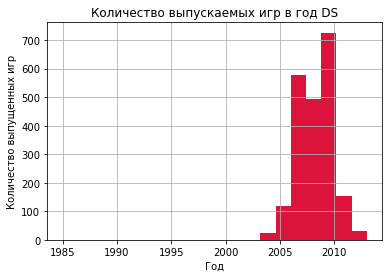

In [29]:
df.query('platform == "DS"').hist('year_of_release', color='crimson', bins=20)
plt.title('Количество выпускаемых игр в год DS')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')

Видим закравшуюся аномалию, она может быть связана с неправильным заполнением данных, например переиздания игры 1985 года.   
Важно заметить, что настоящий разброс укладывается 10 лет.

Text(0, 0.5, 'Количество выпущенных игр')

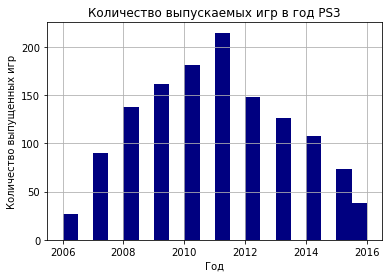

In [30]:
df.query('platform == "PS3"').hist('year_of_release', color='navy', bins=20)
plt.title('Количество выпускаемых игр в год PS3')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')

Text(0, 0.5, 'Количество выпущенных игр')

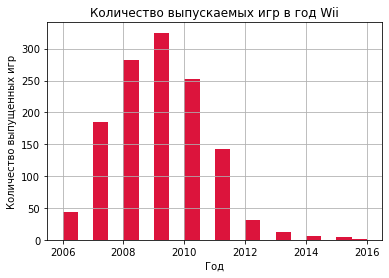

In [31]:
df.query('platform == "Wii"').hist('year_of_release', color='crimson', bins=20)
plt.title('Количество выпускаемых игр в год Wii')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')

Text(0, 0.5, 'Количество выпущенных игр')

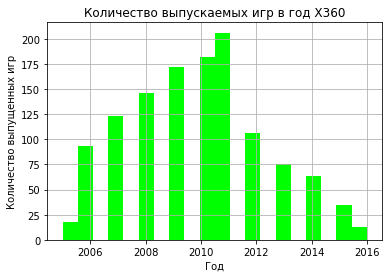

In [32]:
df.query('platform == "X360"').hist('year_of_release', color='lime', bins=20)
plt.title('Количество выпускаемых игр в год X360')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')

В целом, цикл жизни популярной консоли укладывается в 10-11 лет, однако первая половина цикла значительно превосходит вторую в количестве выпущенных игр.
Исходя из этого, имеет смысл рассматривать платформы за последние 5 лет, таким образом мы получим только набирающие популярность платформы.

In [33]:
df_upd = df.query('year_of_release > 2011')
df_upd['platform'].value_counts()

PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: platform, dtype: int64

Посмотрим динамику по годам. 

In [34]:
# таблица мне показалась нагляднее в данном конкретном случае, график выходил слишком пестрым и в нем гораздо легче запутаться.
df_upd.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,NaN,NaN,NaN
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


Учитывая то, что данные за 2016 являются неполными, нас интересуют платформы показывающие рост на 2015 год, таких консолей всего две: PS4(PlayStation 4) и XOne(XBOX One).

Посмотрим как распределены глобальные продажи на этих платформах.

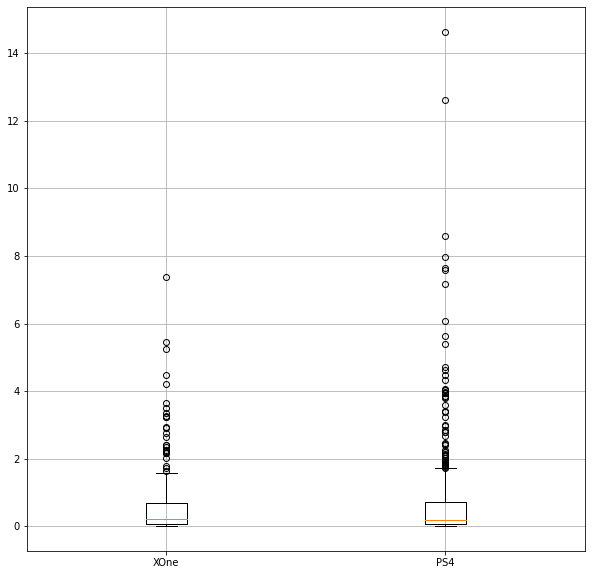

In [35]:
xb_data = df_upd.query('platform=="XOne"')['total_sales']
ps_data = df_upd.query('platform=="PS4"')['total_sales']
bp_data = [xb_data, ps_data]
plt.figure(figsize=(10, 10))
plt.boxplot(bp_data)
plt.xticks([1, 2], ['XOne', 'PS4'])
plt.grid()

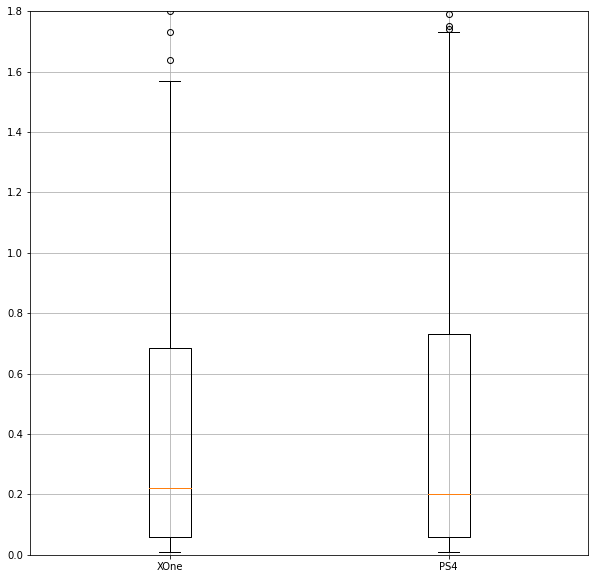

In [36]:
plt.figure(figsize=(10, 10))
plt.boxplot(bp_data)
plt.xticks([1, 2], ['XOne', 'PS4'])
plt.ylim(0, 1.8)
plt.grid()

На графике без ограничений, видно значительное превосходство PS4 в хитах, то есть играх, продажи которых щначительно превышают нормальные значения.  
Основная масса же распределена весьма похоже, первый квартиль на одинаковом уровне, у XOne чуть выше медиана, тогда как у PS4 немного больше третий квартиль.

Рассмотрим зависимости между продажами игр и оценками пользователей и критиков, на примере PS4.
Для лучшей наглядности графиков, ограничим число продаж пятью миллионами.

In [37]:
df_upd = df_upd.query('total_sales <= 5')

array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>]],
      dtype=object)

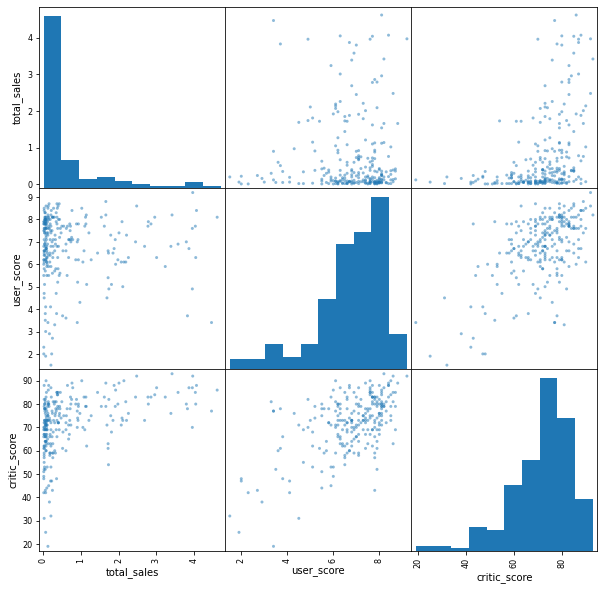

In [38]:
pd.plotting.scatter_matrix(df_upd.query('platform=="PS4"')[['total_sales', 'user_score', 'critic_score']], figsize=(10, 10))

На диаграмме рассеяния можно подметить, что игры с низкими оценками критиков не продаются большим тиражом, в то время как оценки пользователей в отношении успешных игр имеют больший разброс, что можно списать на флешмобы. Также прослеживается сильная корреляция между оценками критиков и пользователей. Сравним эти графики с аналогичными по платформе XOne.

array([[<AxesSubplot:xlabel='total_sales', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='total_sales'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>],
       [<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>]],
      dtype=object)

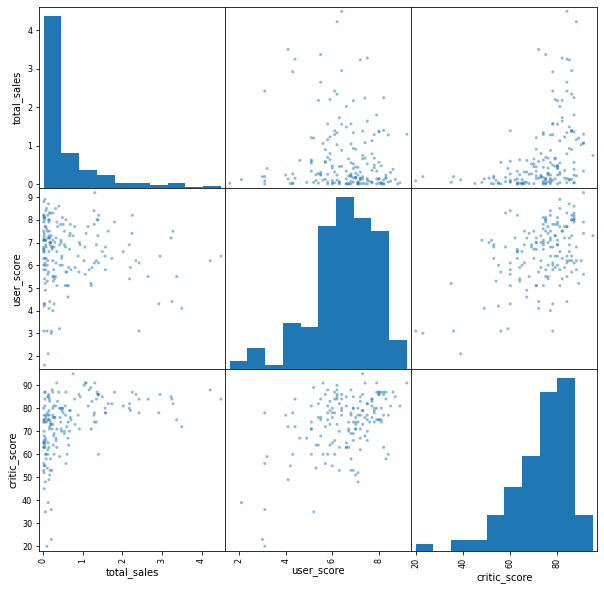

In [39]:
pd.plotting.scatter_matrix(df_upd.query('platform=="XOne"')[['total_sales', 'user_score', 'critic_score']], figsize=(10, 10))

Общие тенденции совпадают.

Теперь посмотрим на данные по жанрам за интересующий нас период.

In [40]:
df_upd.pivot_table(index='genre', values='total_sales', aggfunc=('sum', 'mean', 'median'))

,mean,median,sum
genre,,,
Action,0.347153,0.115,354.79
Adventure,0.097450,0.030,29.43
Fighting,0.342037,0.130,36.94
Misc,0.337725,0.120,63.83
Platform,0.552651,0.190,45.87
Puzzle,0.174643,0.045,4.89
Racing,0.407105,0.135,46.41
Role-Playing,0.381896,0.130,139.01
Shooter,0.869955,0.410,194.00


Наибольшие суммарные продажи с большим отрывом у жанра "Экшн", однако по средним значениям выделяются "Шутеры" и спортивные игры. Наименее популярными жанрами являются: "Стратегии", "Пазлы", "Симуляторы" и "Адвенчуры(Приключенческие игры)".

Теперь посмотрим те же цифры только по интересующим нас платформам.

In [41]:
df_upd.query('platform in ["XOne", "PS4"]').pivot_table(index='genre', values='total_sales', aggfunc=('sum', 'mean', 'median'))

,mean,median,sum
genre,,,
Action,0.508018,0.15,115.32
Adventure,0.214762,0.07,9.02
Fighting,0.444000,0.18,11.10
Misc,0.400513,0.18,15.62
Platform,0.507059,0.26,8.62
Puzzle,0.020000,0.02,0.02
Racing,0.562308,0.23,21.93
Role-Playing,0.505781,0.20,32.37
Shooter,1.318611,0.76,94.94


В целом ситация схожая, однако общая сумма и особенно медиана по жанру "Экшн" значительно проседает по сравнению предыдущей таблицей.

Далее рассмотрим распределение продаж по платформам и жанрам в трех основных регионах.

### Исследование предпочтений пользователей разных регионов

In [42]:
platform_na = df_upd.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
platform_na['platform_share'] = platform_na['na_sales']/platform_na['na_sales'].sum()
platform_na.head()

,na_sales,platform_share
platform,,
X360,98.839996,0.218866
PS4,83.500000,0.184898
XOne,82.500000,0.182684
PS3,78.349998,0.173494
3DS,32.770000,0.072564


В Северной Америке, XBOX и Playstation текущего поколения идут вровень, хотя в предыдущем поколении проажи XBOX были значительно выше.

In [43]:
platform_eu = df_upd.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
platform_eu['platform_share'] = platform_eu['eu_sales']/platform_eu['eu_sales'].sum()
platform_eu.head()

,eu_sales,platform_share
platform,,
PS4,97.910004,0.262247
PS3,72.089996,0.193090
X360,52.490002,0.140592
XOne,45.739998,0.122512
PC,35.599998,0.095353


В европейском регионе Playstation уверенно превосходит конкурентов, также отмечаем присутсвие PC списке наиболее популярных платформ.

In [44]:
platform_jp = df_upd.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
platform_jp['platform_share'] = platform_jp['jp_sales']/platform_jp['jp_sales'].sum()
platform_jp.head()

,jp_sales,platform_share
platform,,
3DS,66.889999,0.415079
PS3,32.639999,0.202544
PSV,21.039999,0.130562
PS4,14.080000,0.087372
PSP,10.470000,0.064971


На японском рынке доминируют портативные консоли, на их долю приходится более 60% всех продаж. Также стоит отметить отсутствие обеих версий XBOX в топ-5.

In [45]:
genre_na = df_upd.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
genre_na['genre_share'] = genre_na['na_sales']/genre_na['na_sales'].sum()
genre_na.head()

,na_sales,genre_share
genre,,
Action,144.059998,0.318999
Shooter,90.070000,0.199446
Sports,78.169998,0.173096
Role-Playing,43.630001,0.096612
Misc,26.410000,0.058481


Жанры Action, Shooter и Sports, в Северной Америке лидируют с заметным отрывом. На три самых популярных жанра приходится большу двух третей всего рынка. Немного удивляет жанр "Разное" в топ-5

In [46]:
genre_eu = df_upd.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
genre_eu['genre_share'] = genre_eu['eu_sales']/genre_eu['eu_sales'].sum()
genre_eu.head()

,eu_sales,genre_share
genre,,
Action,121.739998,0.326075
Shooter,73.970001,0.198125
Sports,48.650002,0.130307
Role-Playing,32.250000,0.086380
Racing,25.139999,0.067336


По Европе картина схожа с Северной Америкой, место "Разного" занимает более логичный Racing.

In [47]:
genre_jp = df_upd.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
genre_jp['genre_share'] = genre_jp['jp_sales']/genre_jp['jp_sales'].sum()
genre_jp.head()

,jp_sales,genre_share
genre,,
Role-Playing,52.349998,0.324853
Action,50.750000,0.314924
Misc,12.840000,0.079677
Adventure,8.240000,0.051132
Sports,7.750000,0.048092


В отличие от других регионов, в Японии всего два сверхпопулярных жанра. К популярному везде Action добавляется RPG. Японцы совсем не любят шутеры(нет даже в топ-5) и значительно меньше любят спортивные игры(разница в 2.5 раза относительно других регионов).

Посмотрим, влияют ли рейтинги ESRB на продажи в .

#### Исследование влияния рейтинга ESRB в регионах

In [48]:
esrb_na = df_upd.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
esrb_na['rating_share'] = esrb_na['na_sales']/esrb_na['na_sales'].sum()
esrb_na

,na_sales,rating_share
rating,,
M,158.220001,0.350354
E,97.720001,0.216386
E10+,71.650002,0.158658
Unknown,62.330002,0.138020
T,61.680000,0.136581


In [49]:
esrb_eu = df_upd.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
esrb_eu['rating_share'] = esrb_eu['eu_sales']/esrb_eu['eu_sales'].sum()
esrb_eu

,eu_sales,rating_share
rating,,
M,135.940002,0.364109
E,75.120003,0.201205
Unknown,60.689999,0.162555
E10+,53.209999,0.142520
T,48.389999,0.129610


In [50]:
esrb_jp = df_upd.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
esrb_jp['rating_share'] = esrb_jp['jp_sales']/esrb_jp['jp_sales'].sum()
esrb_jp

,jp_sales,rating_share
rating,,
Unknown,91.050003,0.565002
T,25.670000,0.159293
E,18.500000,0.114800
M,17.740000,0.110084
E10+,8.190000,0.050822


В Европе и Северной Америке выделяются игры с рейтингом M(Mature) и в целом картина распределения крайне схожая. Это может говорить как о том, что Европа считается с рейтинговой системой созданной для Северной Америки, так и о том , что интересы пользователей этих регионов просто совпадают. Высокие показатели рейтинга M можно связать с популярностью жанров Action и Shooter, игры последнего жанра получают этот рейтинг практически по умолчанию. В этих регионах имеет смысл потратить дополнительные ресурсы на игры с рейтингом M.
В Японии больше половины продаж приходится на игры без рейтинга ESRB, что говорит о том, что японцы не особо считаются с данной организацией и о том, что здесь популярны игры созданные для внутреннего рынка, о чём говорит отсутствие североамериканского рейтинга. Ориентироваться на рейтинг в этом регионе точно не стоит.

Проверим пару гипотез связанных с оценками пользователей.

Сперва проверим гипотезу о равенстве средних баллов игр на платформах PC и XOne.  
В качестве нулевой гипотезы примем: "Средние оценки пользователей PC и XOne одинаковы".  
Альтернативной гипотезой будет: "Средние оценки пользователей PC и XOne различаются".

In [51]:
alpha = 0.05
sample_xbox = df_upd.query('platform == "XOne"')['user_score'] # выборка по XOne
sample_xbox = sample_xbox.dropna() # избавляемся от пустых значений, иначе функция не сработает
sample_pc = df_upd.query('platform == "PC"')['user_score'] # выборка по PC
sample_pc = sample_pc.dropna()
results = st.ttest_ind(sample_xbox, sample_pc, equal_var=False) # не оснований полагать о равном размере выборок, поэтому equal_var выставляем False
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.6084744880524482
Не получилось отвергнуть нулевую гипотезу


Делаем вывод, что пользовательские оценки по этим платформам действительно очень схожи.

Вторая гипотеза будет о разности среднего балла по жанрам Action и Sports.  
За нулевую гипотезу возьмем: "Средние баллы Action и Sports одинаковы".  
Соответственно, альтернативная гипотеза будет гласить "Средние баллы Action и Sports различаются".

In [52]:
alpha = 0.05
sample_action = df_upd.query('genre == "Action"')['user_score']
sample_action = sample_action.dropna()
sample_sports = df_upd.query('genre == "Sports"')['user_score']
sample_sports = sample_sports.dropna()
results = st.ttest_ind(sample_action, sample_sports, equal_var=False)
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

6.422515315426946e-19
Отвергаем нулевую гипотезу


Таким образом, принимаем альтернативую гипотезу, средние оценки по эти жанрам не равны.

## Общий вывод

Имеющиеся в файле данные позволяют провести требуемое исследование, однако требуют обределенной обработки, в частности приведения данных к нужным форматам.  
Названия столбцов были приведены к общему виду, форматы данных были изменены по необходимости или же для экономии ресурсов.  
Часть данных была отброшена ввиду их неактульности для исследования. 

При исследовании был установлен "срок жизни" популярной платформы.   
Выделен актуальный для исследования временной период.  
Отмечены популярные платформы и жанры как для всего мира, так и для каждого из трех крупнейших регионов по отдельности.
Проверены гипотезы схожести пользовательских оценков по платформам и жанрам.

Глобально стоит сделать ставку на платформу PS4 и жанр Action.  
В европейском  и североамериканском регионах рекомендуется направить ресурсы на работу XOne, а также с жанрами Shooter и Sports, помимо этого, стоит рассмотреть выделение дополнительных средств на продвижение игр с рейтингом M.
На японском рынке нужно обратить внимание на жанр Role-Playing  и портативные консоли.